In [60]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [33]:
#load two processed files 

bb = pd.read_csv('billboard_dataset/processed/billboard_cleaned.csv')
af = pd.read_csv('billboard_dataset/processed/audio_features_merged.csv')

In [34]:
print(bb.shape)
print(af.shape)

(327895, 9)
(29383, 23)


In [57]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29383 entries, 0 to 29382
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   song_id                    29383 non-null  object 
 1   performer                  29383 non-null  object 
 2   song                       29383 non-null  object 
 3   spotify_genre              25232 non-null  object 
 4   spotify_track_duration_ms  24286 non-null  float64
 5   spotify_track_explicit     24286 non-null  object 
 6   spotify_track_album        24280 non-null  object 
 7   danceability               24224 non-null  float64
 8   energy                     24224 non-null  float64
 9   key                        24224 non-null  float64
 10  loudness                   24224 non-null  float64
 11  mode                       24224 non-null  float64
 12  speechiness                24224 non-null  float64
 13  acousticness               24224 non-null  flo

In [39]:
#confirm uniqueness of song_id column

def is_unique(df,col):
    total_count = len(df[col])
    unique_count = df[col].nunique()
    return total_count == unique_count
    
is_unique(af,'song_id')  

True

In [58]:
#convert spotify_track_explicit to type bool

af['spotify_track_explicit'] = af['spotify_track_explicit'].astype(bool)

In [61]:
af.head()

,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart
0,Solid RockGoanna,Goanna,Solid Rock,"[""australian children's music"", ""children's music""]",275226.0,False,Spirit Of Place (Remastered & Expanded),0.552,0.741,9.0,-7.388,0.0,0.0476,0.006990,0.00133,0.0317,0.508,148.996,4.0,57.0,71,1983-07-23,7
1,Burning HeartVandenberg,Vandenberg,Burning Heart,"[""australian children's music""]",250693.0,False,Vandenberg,0.438,0.546,11.0,-10.331,1.0,0.0419,0.127000,0.00000,0.1820,0.486,125.221,4.0,44.0,39,1983-04-09,14
2,Junk Food JunkieLarry Groce,Larry Groce,Junk Food Junkie,"[""children's music"", 'nursery']",196346.0,False,Junk Food Junkie,0.440,0.655,4.0,-8.424,1.0,0.4320,0.627000,0.00000,0.6070,0.899,205.187,4.0,20.0,9,1976-04-17,15
3,Bad DayAlvin And The Chipmunks,Alvin And The Chipmunks,Bad Day,"[""children's music""]",214666.0,False,Alvin And The Chipmunks (Original Motion Picture Soundtrack),0.692,0.663,9.0,-3.955,1.0,0.0290,0.176000,0.14200,0.1710,0.315,139.995,4.0,35.0,67,2008-01-19,2
4,FunkytownAlvin And The Chipmunks,Alvin And The Chipmunks,Funkytown,"[""children's music""]",214053.0,False,Alvin And The Chipmunks (Original Motion Picture Soundtrack),0.807,0.742,0.0,-7.013,1.0,0.0563,0.000802,0.92900,0.0812,0.285,123.037,4.0,29.0,86,2008-01-19,2


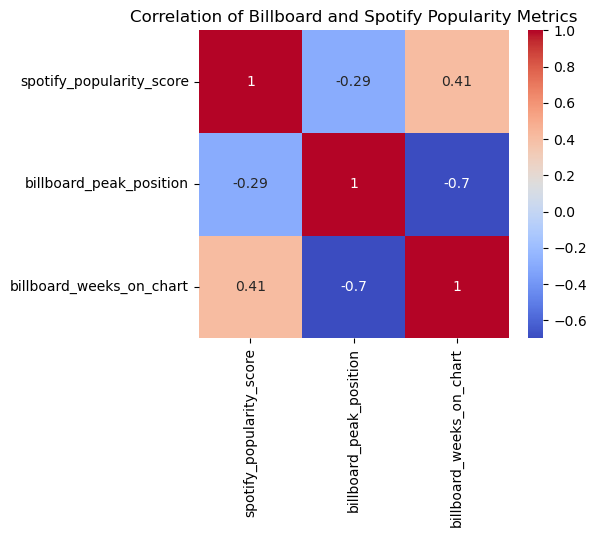

In [74]:
#correlation matrix 1: correlation b/w Spotify and Billboard Popularity

af_corr1 = af[['spotify_track_popularity','peak_position','weeks_on_chart']].copy()

#rename columns
af_corr1.rename(columns={
    'spotify_track_popularity': 'spotify_popularity_score',
    'peak_position': 'billboard_peak_position',
    'weeks_on_chart': 'billboard_weeks_on_chart'
    
}, inplace=True)

corr1 = af_corr1.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr1,annot=True,cmap='coolwarm')
plt.title('Correlation of Billboard and Spotify Popularity Metrics')

plt.show()

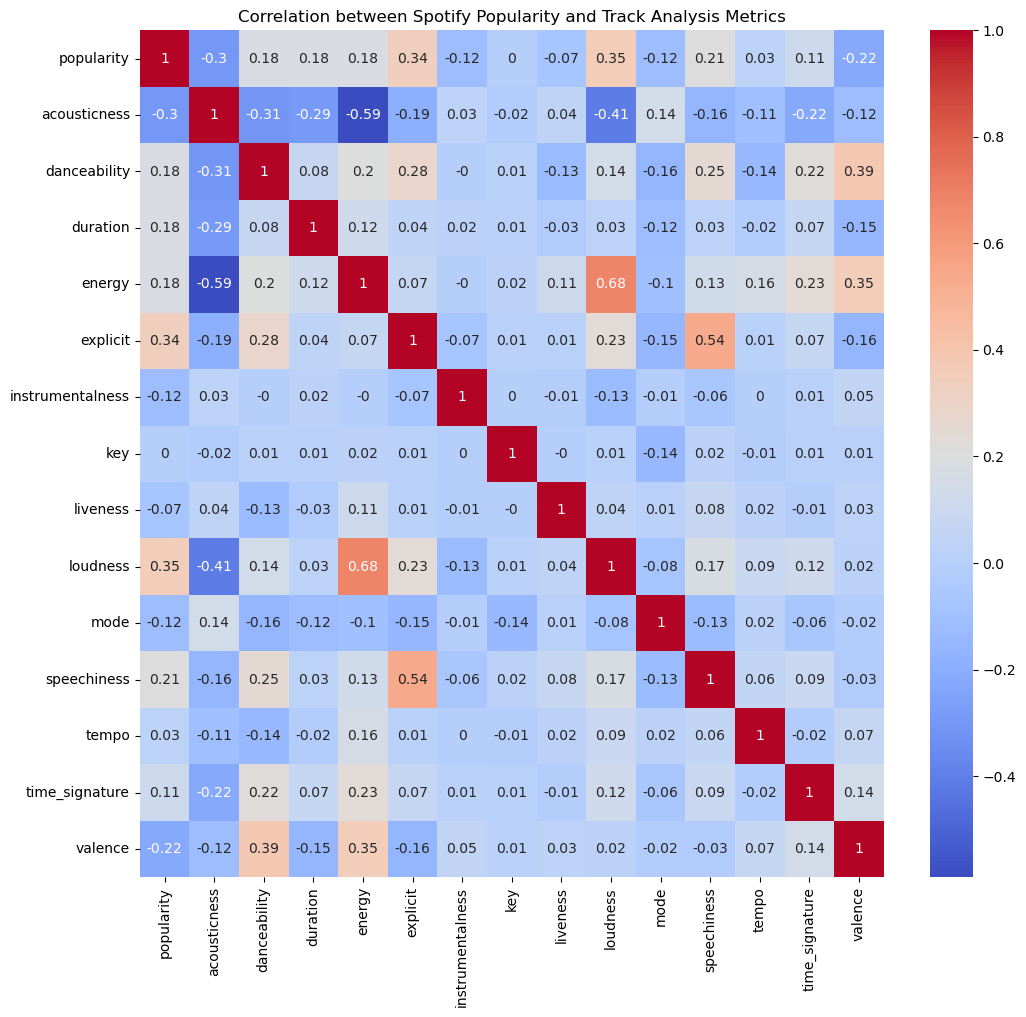

In [85]:
#correlation matrix 2: Spotify Popularity Score and Track Metrics

af_corr2 = af[['spotify_track_popularity',
               'spotify_track_explicit',
               'spotify_track_duration_ms',
               'danceability',
               'energy',
               'key',
               'loudness',
               'mode',
               'speechiness',
               'acousticness',
               'instrumentalness',
               'liveness',
               'valence',
               'tempo',
               'time_signature']].copy()

#rename columns
af_corr2.rename(columns={
    'spotify_track_popularity': 'popularity',
    'spotify_track_explicit': 'explicit',
    'spotify_track_duration_ms': 'duration'
    
}, inplace=True)

#change order for visual
af_corr2_sorted = af_corr2[sorted(af_corr2.columns)] 

#bring popularity score to front
pop = 'popularity'
new_order = [pop] + [i for i in af_corr2_sorted.columns if i != pop]
af_corr2_sorted = af_corr2_sorted[new_order]

corr2 = af_corr2_sorted.corr().round(2)

plt.figure(figsize=(12,11))
sns.heatmap(corr2,annot=True,cmap='coolwarm')
plt.title('Correlation between Spotify Popularity and Track Analysis Metrics')

plt.show()

In [42]:
genres = pd.DataFrame(af['spotify_genre'].unique())

In [98]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3374 non-null   object
dtypes: object(1)
memory usage: 26.5+ KB


In [95]:
# Explode the 'Genres' column into multiple rows
import ast

af['spotify_genre'] = af['spotify_genre'].apply(ast.literal_eval)

def safe_convert_to_list(val):
    if pd.isna(val):
        return []  # Return an empty list for NaN values
    elif isinstance(val, str):
        try:
            # Check if the string is in the correct list format
            if val.startswith('[') and val.endswith(']'):
                return ast.literal_eval(val)
            else:
                return [val]  # Return the string itself as a single-item list if it's not a list format
        except Exception:
            return [val]  # Return the string itself as a single-item list in case of parsing error
    else:
        return [val]  # Return non-string, non-NA values as single-item lists

af['spotify_genre'] = af['spotify_genre'].apply(convert_to_list)


ValueError: malformed node or string: nan